In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import math

from sklearn.metrics import mean_squared_error
import re as re

In [3]:
df= pd.read_csv('/Users/viplovmadan/Downloads/fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [5]:
df.shape

(18207, 60)

In [6]:
##Drop the columns which you think redundant for the analysis. (1 point)
##[Hint: columns like 'Photo','Flag','Club Logo']
df.drop(["Photo", "Flag", "Club Logo"], axis=1, inplace=True)

In [7]:
df.shape

(18207, 57)

In [8]:
df['Release Clause']=df['Release Clause'].astype('string')
df['Release Clause']=df['Release Clause'].str.replace("€","")



In [9]:
def clearCurrency(x):
            if(x.find('M')!= -1 and x!='NA'):
                z=x.replace("M","")
                y=float(z)
                return(y*1000000)                
            elif(x.find('K')!= -1 and x!='NA'):
                z=x.replace("K","")
                y=float(z)
                return(y*1000)
                

                                                 
                      
df['Release Clause']=df['Release Clause'].astype(str).apply(clearCurrency)




    

In [10]:
df['Wage']=df['Wage'].astype('string')
df['Wage']=df['Wage'].str.replace("€","")
df['Value']=df['Value'].astype('string')
df['Value']=df['Value'].str.replace("€","")


In [11]:
df['Wage']=df['Wage'].astype(str).apply(clearCurrency)
df['Value']=df['Value'].astype(str).apply(clearCurrency)

In [12]:
##Convert the column "Joined" into integer data type with keeping only the year.
df['Joined']=pd.to_datetime(df['Joined'])
df['Joined']= df['Joined'].dt.year
df['Joined']=df['Joined'].fillna(0.0).astype(int);

In [13]:
##Convert the column "Contract Valid Until" to pandas datetime type.
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])


In [14]:
##The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.
df['Height']=df['Height'].astype('string')
df['Height']= df['Height'].str.replace('\'','.')
df['Height']= df['Height'].astype(float)

In [15]:
df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [16]:
##The column "Weight" has the suffix as lbs, remove the suffix and convert to float
df['Weight']=df['Weight'].astype('string')
df['Weight']= df['Weight'].str.replace('lbs','')
df['Weight']= df['Weight'].astype(float)


In [17]:
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      17966 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

In [19]:
##Check for the percentage of missing values and impute them with appropriate imputation techniques.

df.isna().sum()/len(df)*100
df['Loaned From'].fillna("No Value", inplace=True)
df.fillna(0, inplace=True)

In [20]:
df.isna().sum()/len(df)*100

ID                          0.0
Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Work Rate                   0.0
Body Type                   0.0
Position                    0.0
Jersey Number               0.0
Joined                      0.0
Loaned From                 0.0
Contract Valid Until        0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallCont

/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


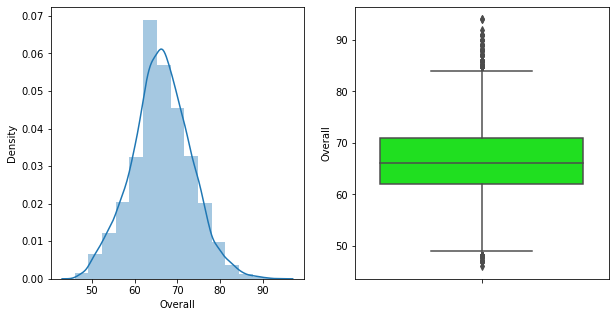

In [129]:
Fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(df['Overall'], bins=15, ax=ax[0])
sns.boxplot(y=df['Overall'], ax=ax[1], color='lime')
plt.show()

##### Box Plot shows there are outliers in the data.

In [22]:
#Retrieve the names of top20 players based on the Overall rating.
df.sort_values(by='Overall', ascending=False).iloc[:20,]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


In [23]:
##Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.
top20_df = df.sort_values(by='Overall', ascending=False).iloc[:20,]
top20_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


In [131]:
##What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11) (2 points)

avgAge= str(top20_df[['Age']].mean())
avgWage= str(top20_df[['Wage']].mean())

print('Average Age : ' + avgAge + ' Yrs and Average Wage : €' + avgWage)

Average Age : Age    29.55
dtype: float64 Yrs and Average Wage : €Wage    294950.0
dtype: float64


In [25]:
##Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

topWage=top20_df[['Wage']].idxmax()
top20_df[['Name','Wage']].iloc[topWage]


,Name,Wage
0,L. Messi,565000.0


In [35]:
#Generate a dataframe which should include the "Player name", "Club
#Name", "Wage", and 'Overall rating'. (4 Points)


df_2= df[['Name','Club','Wage','Overall']]
df_2

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91
...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,1000.0,47
18203,N. Christoffersson,Trelleborgs FF,1000.0,47
18204,B. Worman,Cambridge United,1000.0,47
18205,D. Walker-Rice,Tranmere Rovers,1000.0,47


In [34]:
#- i) find the average Overall rating for each club.
df_2[['Club','Overall']].groupby(['Club']).mean()

,Overall
Club,
0,67.224066
SSV Jahn Regensburg,65.586207
1. FC Heidenheim 1846,65.750000
1. FC Kaiserslautern,63.384615
1. FC Köln,70.785714
...,...
Zagłębie Sosnowiec,60.760000
Çaykur Rizespor,66.900000
Örebro SK,60.481481


/var/folders/lp/7f_1_1vn05l5xr8j5nf2bsc80000gn/T/ipykernel_1361/1394661933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Club Rank']= df_2['Overall'].rank(method= 'average', ascending= False)


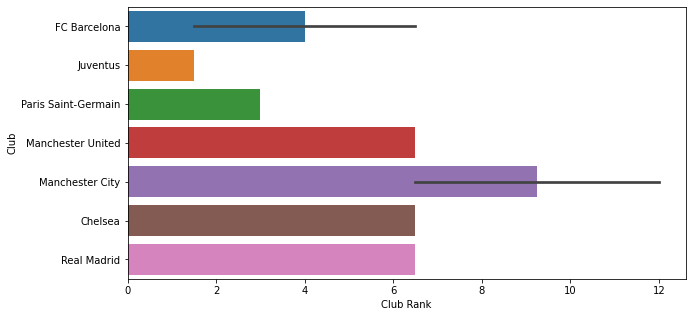

                 Name                 Club      Wage  Overall  Club Rank
0            L. Messi         FC Barcelona  565000.0       94        1.5
1   Cristiano Ronaldo             Juventus  405000.0       94        1.5
2           Neymar Jr  Paris Saint-Germain  290000.0       92        3.0
3              De Gea    Manchester United  260000.0       91        6.5
4        K. De Bruyne      Manchester City  355000.0       91        6.5
5           E. Hazard              Chelsea  340000.0       91        6.5
6           L. Modrić          Real Madrid  420000.0       91        6.5
7           L. Suárez         FC Barcelona  455000.0       91        6.5
8        Sergio Ramos          Real Madrid  380000.0       91        6.5
13        David Silva      Manchester City  285000.0       90       12.0


In [132]:
#- ii) Display the average overall rating of Top10 Clubs using a plot

df_2['Club Rank']= df_2['Overall'].rank(method= 'average', ascending= False)
df_top10_clubs= df_2.sort_values(['Club Rank'], ascending =[True]).head(10)

plt.figure(figsize=(10,5))
sns.barplot(y='Club', x='Club Rank', data= df_top10_clubs)
plt.show()
print(df_top10_clubs)

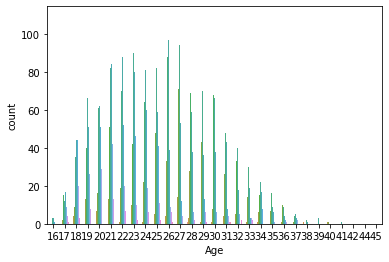

In [49]:
#What is the relationship between age and individual potential of the
#player? Visualize the relationship with appropriate plot and Comment on
#the same. (2 points)

g=sns.countplot(x='Age',hue='Potential',data=df)
g.legend_.remove()

#### We can see that the maximum potential of a player is between the age 21 to 27 and it starts to reduce after that age

In [133]:
#Which features directly contribute to the wages of the players?
#Support your answer with a plot and a metric. (2 points) (hint: use
#potential, Overall, value, international reputation, and Release Clause)

df_wage_rel = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
df_wage_rel.corr()

,Potential,Overall,Value,International Reputation,Release Clause,Wage
Potential,1.000000,0.660939,0.576218,0.373899,0.547668,0.486413
Overall,0.660939,1.000000,0.627085,0.498599,0.589200,0.571926
Value,0.576218,0.627085,1.000000,0.649007,0.967255,0.858442
International Reputation,0.373899,0.498599,0.649007,1.000000,0.614457,0.664289
Release Clause,0.547668,0.589200,0.967255,0.614457,1.000000,0.820162
Wage,0.486413,0.571926,0.858442,0.664289,0.820162,1.000000


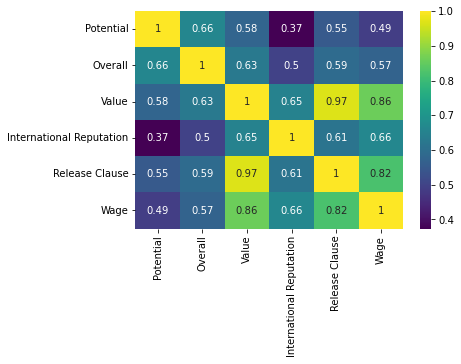

In [134]:
sns.heatmap(df_wage_rel[['Potential','Overall','Value','International Reputation','Release Clause','Wage']].corr(), annot=True, cmap='viridis')
plt.show()

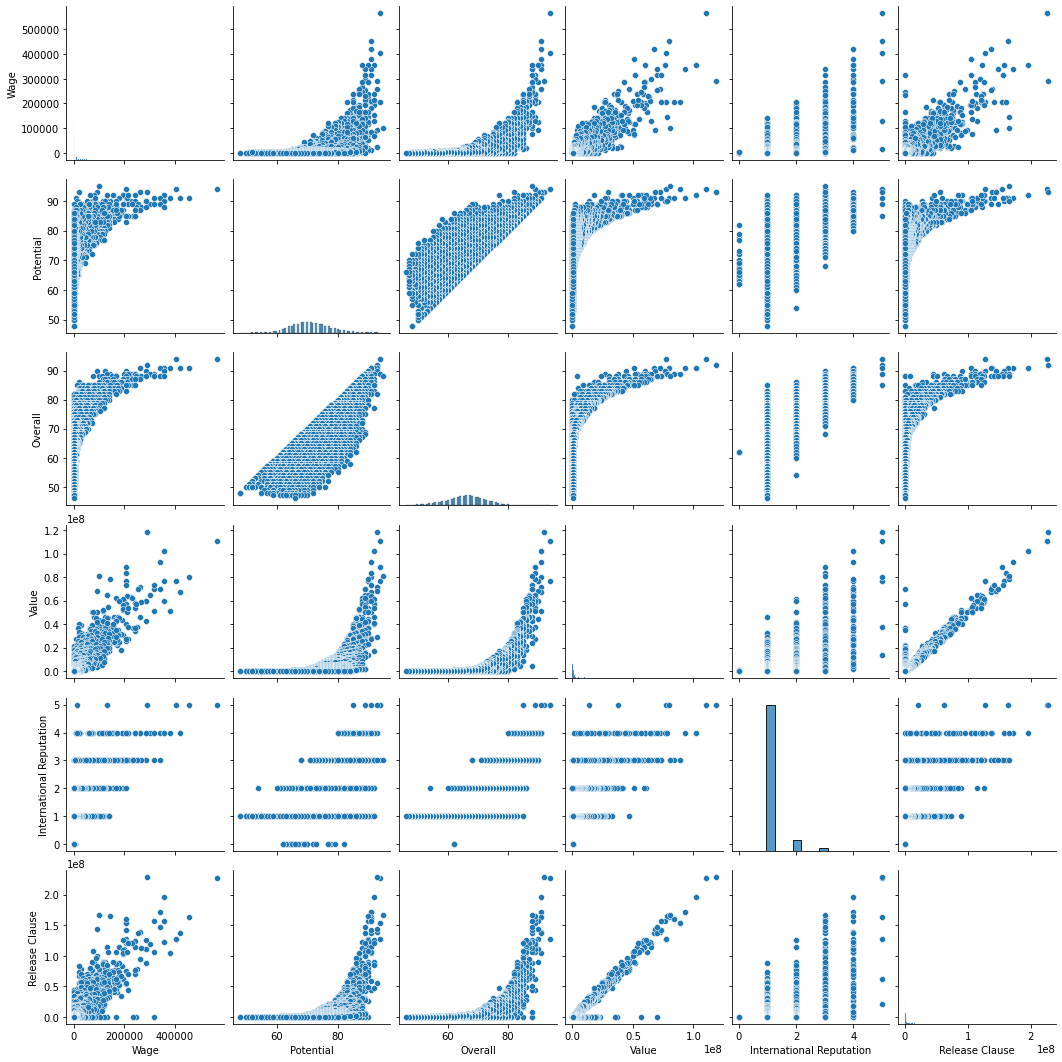

In [135]:
target = df_wage_rel['Wage']
sns.pairplot(df_wage_rel[['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']])
plt.show()

In [76]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
0        60
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

<AxesSubplot:>

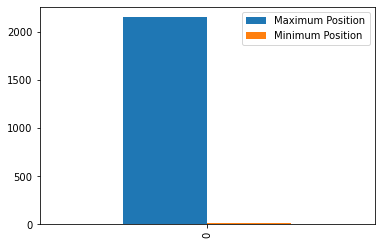

In [75]:
#Find the position in the pitch where the maximum number of players
#play and the position where the minimum number of players play? Display
#it using a plot. (2 points)

maxCount=df['Position'].value_counts().max()
minCount= df['Position'].value_counts().min()
d={'Maximum Position':maxCount,'Minimum Position':minCount}
MaxMin_df=pd.DataFrame(data=d, index=[0])
MaxMin_df
MaxMin_df[['Maximum Position','Minimum Position']].plot.bar()


#### 2152 Players Players Play at ST position which is the maximum while 15 players play at LF position which is the minimum


In [93]:
##How many players are from the club 'Juventus' and the wage is greater
#than 200K? Display all the information of such players. (2 points)
options= ['Juventus']

rslt_df = df[(df['Wage'] > 200000) & 
          df['Club'].isin(options)] 
rslt_df


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [94]:
len(rslt_df)

3

#### There are 3 players in Club Juventus who have wages greater than 200K

In [123]:
##Generate a data frame containing top 5 players by Overall rating for each unique position.
top5EachPosition_df=df.groupby(by='Position').apply(lambda x:x.sort_values(by='Overall', ascending=False).head(5))
top5EachPosition_df

ID               Name  Age Nationality  Overall  \
Position                                                              
0        5018   153160          R. Raldes   37     Bolivia       70   
         6736   175393            J. Arce   33     Bolivia       68   
         7922   195905       L. Gutiérrez   33     Bolivia       67   
         9905   226044          R. Vargas   23     Bolivia       66   
         10628  216751        D. Bejarano   26     Bolivia       65   
...                ...                ...  ...         ...      ...   
ST       1       20801  Cristiano Ronaldo   33    Portugal       94   
         10     188545     R. Lewandowski   29      Poland       90   
         16     202126            H. Kane   24     England       89   
         23     153079          S. Agüero   30   Argentina       89   
         36     173731            G. Bale   28       Wales       88   

                Potential               Club       Value      Wage  \
Position                                                             
0        5018          70                  0         0.0       0.0   
         6736          68                  0         0.0       0.0   
         7922          67                  0         0.0       0.0   
         9905          69                  0         0.0       0.0   
         10628         66                  0         0.0       0.0   
...                   ...                ...         ...       ...   
ST       1             94           Juventus  77000000.0  405000.0   
         10            90  FC Bayern München  77000000.0  205000.0   
         16            91  Tottenham Hotspur  83500000.0  205000.0   
         23            89    Manchester City  64500000.0  300000.0   
         36            88        Real Madrid  60000000.0  355000.0   

               Preferred Foot  ...  Composure  Marking  StandingTackle  \
Position                       ...                                       
0        5018           Right  ...       64.0     79.0            70.0   
         6736            Left  ...       67.0     12.0            34.0   
         7922           Right  ...       54.0     72.0            71.0   
         9905           Right  ...       64.0     19.0            24.0   
         10628          Right  ...       57.0     68.0            69.0   
...                       ...  ...        ...      ...             ...   
ST       1              Right  ...       95.0     28.0            31.0   
         10             Right  ...       86.0     34.0            42.0   
         16             Right  ...       89.0     56.0            36.0   
         23             Right  ...       90.0     30.0            20.0   
         36              Left  ...       86.0     54.0            55.0   

               SlidingTackle GKDiving GKHandling  GKKicking  GKPositioning  \
Position                                                                     
0        5018           70.0     16.0        8.0       11.0           12.0   
         6736           33.0     16.0       13.0       15.0           16.0   
         7922           64.0     11.0        7.0        8.0           12.0   
         9905           23.0     13.0       11.0       11.0            7.0   
         10628          68.0     14.0       12.0       11.0           14.0   
...                      ...      ...        ...        ...            ...   
ST       1              23.0      7.0       11.0       15.0           14.0   
         10             19.0     15.0        6.0       12.0            8.0   
         16             38.0      8.0       10.0       11.0           14.0   
         23             12.0     13.0       15.0        6.0           11.0   
         36             52.0     15.0       15.0       11.0            5.0   

               GKReflexes Release Clause  
Position                                  
0        5018        13.0            0.0  
         6736         8.0            0.0  
         7922        12.0          

In [127]:
#What is the average wage one can expect to pay for the top 5 players
#in every position? (use the data frame created in Q19) (2 points)
avgWage=top5EachPosition_df['Wage'].groupby(by='Position').mean()
display(avgWage)

Position
0           0.0
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64